In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_max
import scipy.special

In [2]:
df = pd.read_csv('windspeed.csv')
df
array = df.values

In [3]:
len(array)

46008

In [4]:
lst=list()
for i in range(24):
    a=np.array([])
    for j in range(i,len(array),24):

        a = np.append(a, array[j])
    a.sort()
    lst.append(a)
    
for arr in lst:
    print(arr.shape)

(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)
(1917,)


In [5]:
def weibull(k,c,v):
    return (k/c)*((v/c)**(k-1))*np.exp(-(v/c)**k)
def weibull_cdf(k,c,v):
    return 1-np.exp(-(v/c)**k)

Mean               :-  4.506714285714286
Standard Deviation :-  2.12084945030604
k                  :-  2.267265088043428
c                  :-  5.087815567493193


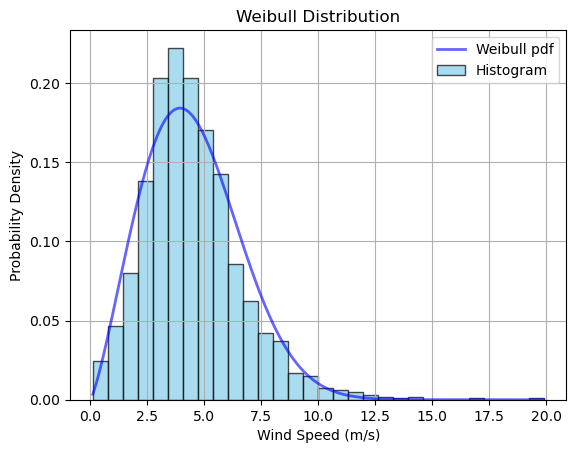

In [6]:
i=7
mean=0;
std_dev=0;
b=lst[i]
for j in range(8):
    random_samples = np.random.choice(b, size=350, replace=False)

    # Calculate mean and standard deviation of the random samples
    mean = mean+np.mean(random_samples)
    std_dev = std_dev+np.std(random_samples)

mu=mean/8
std=std_dev/8
print(f'Mean               :-  {mean/8}')
print(f'Standard Deviation :-  {std_dev/8}')

k=(std/mu)**(-1.086)
# k=2
c=mu/scipy.special.gamma(1+1/k)

print(f'k                  :-  {k}')
print(f'c                  :-  {c}')


shape = k  # Shape parameter (also known as k)
scale = c  # Scale parameter (also known as lambda)

# Generate Weibull distribution
x = lst[i]  # Range of x values
pdf = weibull(shape, scale,x)  # Probability density function

# Plotting
plt.plot(x, pdf, 'b-', lw=2, alpha=0.6, label='Weibull pdf')
plt.hist(x, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True, label='Histogram')
plt.title('Weibull Distribution')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
vin=4
vr=13
vout=25
Pr=15

a1=Pr/(vr**3-vin**3)
b1=(vin**3)/(vr**3-vin**3)
scale

5.087815567493193

In [8]:
def P_out(vx,shape,scale):
    Pwr=0
    if vx<=vin or vx>=vout:
        Pwr=0
    elif vx>vin and vx<vr:
        Pwr=a1*(vx**3)+b1*Pr
    else:
        Pwr=Pr
    fv = weibull_cdf(shape, scale,vx)
    return fv*Pwr

In [9]:
P_out(8,shape,scale)

3.80191213133858

In [10]:
def calculate_k_c(v):
    mean=0;
    std_dev=0;
    for j in range(8):
        random_samples = np.random.choice(v, size=350, replace=False)

        # Calculate mean and standard deviation of the random samples
        mean = mean+np.mean(random_samples)
        std_dev = std_dev+np.std(random_samples)

    mu=mean/8
    std=std_dev/8
    k=(std/mu)**(-1.086)
    # k=2
    c=mu/scipy.special.gamma(1+1/k)
    
    return k,c    

[3.53226883 3.55705895 3.547757   3.49633575 3.52702277 3.49827129
 3.49860861 3.50093776 3.48694617 3.46557732 3.48561398 3.52286728
 3.45551699 3.44874676 3.4072726  3.46145812 3.45372833 3.46616242
 3.49110711 3.51117016 3.51016782 3.52756588 3.49784888 3.49317361]


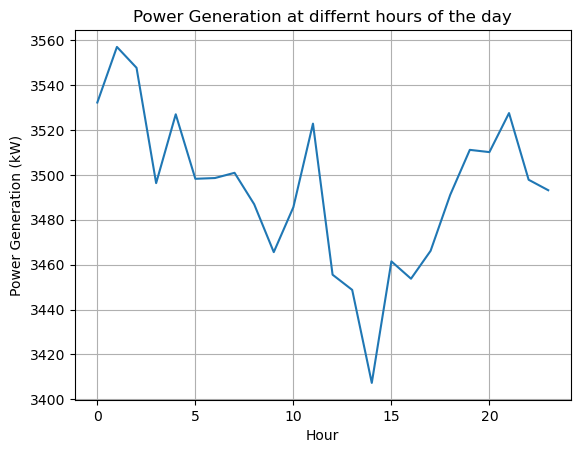

In [11]:
import numpy as np
import matplotlib.pyplot as plt

power_generation = []  # Initialize empty list before the loop

for i in range(0, 24):
    v = lst[i]
    shape, scale = calculate_k_c(v)
    dummy = P_out(28/3.6,shape, scale)
#     print(dummy)
    power_generation.append(dummy)

power_generation = np.array(power_generation)  # Convert list to NumPy array
print(power_generation)
plt.plot(power_generation*1000)
plt.title('Power Generation at differnt hours of the day')
plt.xlabel('Hour')
plt.ylabel('Power Generation (kW)')
plt.grid(True)
plt.show()

[ 0.          0.          0.          0.          0.78540936  1.49373635
  2.47698984  3.84412201  5.4823587   7.43331408  9.79485509 12.59569774
 14.99962077 14.9998381  14.99999217 14.99999986 14.99999999 15.
 15.         15.         15.         15.         15.         15.
  0.          0.          0.          0.          0.        ]


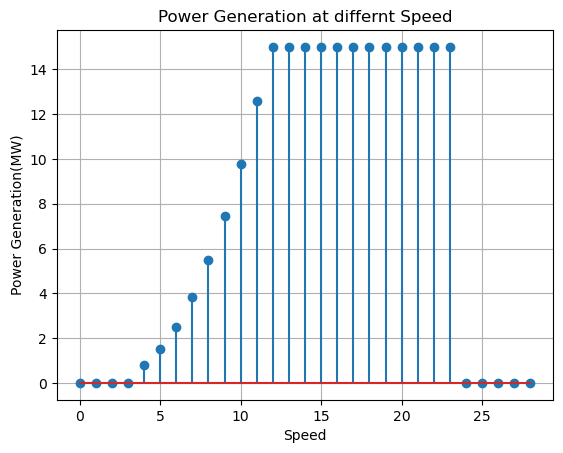

In [12]:
power_generation = []  # Initialize empty list before the loop

v = lst[10]
for i in range(1,30):
    shape, scale = calculate_k_c(v)
    dummy = P_out(i,shape, scale)
#     print(dummy)
    power_generation.append(dummy)

power_generation = np.array(power_generation)  # Convert list to NumPy array
print(power_generation)
plt.stem(power_generation)
plt.title('Power Generation at differnt Speed')
plt.xlabel('Speed')
plt.ylabel('Power Generation(MW)')
plt.grid(True)
plt.show()